<a href="https://colab.research.google.com/github/minsun24/Data-Science/blob/main/%EC%9D%91%ED%86%B5_%EC%8B%A4%EC%8A%B52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **모집단의 분산을 알고 있을 때 - 정규분포의 모평균의 구간 추정**

모분산 σ²

모평균 μ = E(X)


In [39]:
# 점추정 및 구간 추정에 필요한 라이브러리

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


In [40]:
# 첨부된 파일(.csv) 읽고 score값에 대한 전체 모평균, 모분산을 구하기
# 전체 모평균과 모분산 값을 기준으로
# 앞으로 구할 표본 평균과 분산을 기준으로 점추정 및 구간 추정에 대한 참고자료로 활용?

# 파일 읽어오기
df = pd.read_csv('scores400.csv')

df   # 400개의 scores 자료


,score
0,76
1,55
2,80
3,80
4,74
...,...
395,77
396,60
397,83
398,80


In [41]:
scores = np.array(df['score'])
scores

array([ 76,  55,  80,  80,  74,  61,  81,  76,  23,  80,  41,  80,  68,
        88,  69,  57,  68,  86,  70,  68,  81,  73,  70,  90,  93,  79,
        66,  92,  88,  81,  52,  72,  59,  68,  74,  72,  63,  89,  45,
        81,  42,  76,  57,  83,  71,  74,  55,  60,  73,  79, 100,  73,
        85,  47,  50,  65,  52,  92,  64,  91,  92,  71,  78,  69,  78,
        77,  68,  78,  96,  81,  75,  72,  55,  55,  75,  49,  59,  89,
        99,  45,  94,  67,  70,  68,  86,  46,  77,  56,  79,  93,  70,
        76,  76,  58,  93,  96,  81,  71,  63,  61,  96,  91,  69,  46,
        28,  54,  68,  91,  60,  78,  90,  72,  68,  50,  52,  76,  67,
        72,  69,  80,  58,  65,  98,  58,  66,  61,  77,  85,  63,  64,
        66,  78,  59,  64,  34,  49,  68,  83,  74,  54,  49,  73,  45,
        86,  71,  46,  56,  59,  58,  48,  57,  60,  59,  87,  72,  55,
        65,  57,  65,  83,  74, 100,  76,  56,  82,  86,  86,  54,  68,
        87,  45,  63,  49,  56,  55,  89,  66,  57,  54,  72,  7

In [42]:
# numpy.var(array)  => 분산 함수

p_mean = np.mean(scores) # 모평균 p_mean
p_var = np.var(scores) # 모분산

print("모평균", p_mean)
print('모분산', p_var)

모평균 69.53
모분산 206.6691


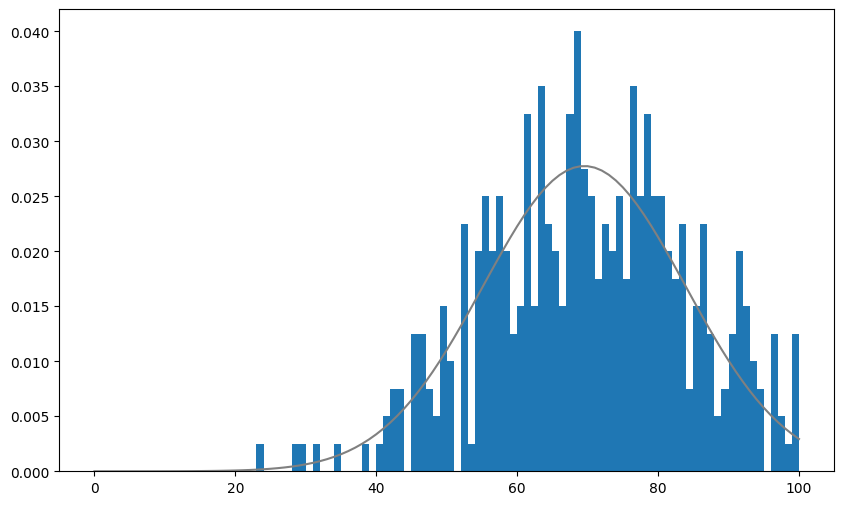

In [43]:
# 구한 모평균과 모분산 이용해 정규분포 그림을 그리기

fig = plt.figure(figsize = (10, 6))  # 새로운 도표(figure) 생성 - 최초 창의 크기를 가로 10, 세로 6인치로 설정

ax = fig.add_subplot(111)  #생성한 figure에 subplot 추가 - 도표 내 작은 부분이 subplot
# 1 X 1 그리드의 첫번째 subplot을 의미

xs = np.arange(101)  # arange(N) : 0~N-1까지의 숫자를 생성 -> x축 값으로 이용

rv = stats.norm(p_mean, np.sqrt(p_var))  # scipy의 stats 모듈 사용
# stats.norm(모수기댓값, 모수표준편차) :정규분포 객체 생성
# 우리가 구한 p_mean 은 모수의 평균(모수의 기댓값)
# p_var은 모수의 분산이기 때문에, np.sqrt() 함수를 사용해서 분산의 제곱근을 계산해 모수의 표준편차로 바꾼다.

ax.plot(xs, rv.pdf(xs), color='gray')    #subplot에 정규분포 확률 밀도 함수 그리기
# xs -> x축 값들
# rv.pdf(xs) -> 해당 x 값에서의 확률 밀도 함수

ax.hist(scores, bins=100, range=(0,100), density=True)
# subplot.hist() : subplot에 히스토그램 추가
# -> scores : 데이터 배열 / bins : 히스토그램의 막대 개수 100개 / range(0, 100) : 0~100까지의 축 범위 지정 / density=True는 히스토그램의 면적을 1로 정규화

plt.show() # 종적으로 그린 도표를 화면에 표시


In [44]:
# 전체 데이터로부터 20개의 데이터를 추출 => 표본의 개수 n = 20

np.random.seed(0)   #난수 발생 시드 설정 -> 난수 발생 과정이 재현 가능 / 동일한 시드를 사용하면 항상 동일한 난수 시퀀스가 생성

n = 20 # 표본의 크기

print('scores shape', scores.shape)  # (400, )
sample = np.random.choice(scores, n) #scores 배열에서 20개를 랜덤으로 추출
print('표본', sample)

scores shape (400,)
표본 [49 60 72 86 52 61 77 91 80 56 69 67 90 56 75 79 60 79 68 81]


In [45]:
# 20 개의 데이터를 검출하는 과정을 여러 번 반복 -> 샘플 많이 뽑으면 뽑을수록 모평균에 가깝다.

# 점추정 : 모수의 추정 방법으로 샘플로 나온 데이터로부터 모수가 어떤 값을 가질 것이다 라는 하나의 값을 추정하는 방법

np.random.seed(17)

n_samples = 1000 #20개의 표본을 뽑는 시험을 1000번 할 것이다.
samples = np.random.choice(scores, (n_samples, n))
# scores 배열에서 랜덤 추출해 1000개의 행과 각 행당 20개의 열을 가진 2차원 배열을 생성

samples.shape

(1000, 20)

In [46]:
samples   # 20개 뽑은 표본 1000개 -> 1000행 * 20열

array([[72, 87, 86, ..., 78, 76, 76],
       [86, 71, 86, ..., 40, 69, 69],
       [79, 92, 65, ..., 92, 73, 61],
       ...,
       [77, 56, 64, ..., 78, 98, 46],
       [79, 49, 65, ..., 62, 63, 77],
       [80, 92, 58, ..., 82, 63, 68]])

In [47]:
samples[1]

array([86, 71, 86, 52, 55, 77, 75, 59, 52, 67, 86, 80, 71, 65, 73, 52, 67,
       40, 69, 69])

In [48]:
# 20개의 샘플에 대한 평균을 5번 구하는 과정

for i in range(5):
  s_mean = np.mean(samples[i])
  print(f'{i+1}번째 표본평균 : {s_mean:.3f}')  #소수점 3자리까지

1번째 표본평균 : 75.850
2번째 표본평균 : 67.600
3번째 표본평균 : 71.000
4번째 표본평균 : 67.550
5번째 표본평균 : 68.950


In [49]:
sample0_means = np.mean(samples[0])
print(sample0_means)

sample1_means = np.mean(samples[1])
print(sample1_means)


75.85
67.6


In [50]:
# 1000행20열 표본들의 각 행의 평균 구하기
sample_means = np.mean(samples, axis=1)
#axis=1 열 방향으로 동작 -> 1000개의 원소를 가진 1차원 배열

sample_means

array([75.85, 67.6 , 71.  , 67.55, 68.95, 71.3 , 71.3 , 69.6 , 66.6 ,
       62.85, 72.15, 67.7 , 65.45, 65.6 , 65.45, 68.5 , 69.65, 74.3 ,
       70.4 , 70.3 , 64.45, 68.45, 70.55, 68.9 , 69.55, 70.95, 70.6 ,
       75.6 , 69.35, 70.1 , 76.05, 67.1 , 69.4 , 78.8 , 68.1 , 69.35,
       67.55, 74.55, 69.6 , 71.3 , 75.85, 62.9 , 72.7 , 72.  , 70.35,
       71.15, 64.4 , 67.3 , 72.  , 65.2 , 67.35, 75.3 , 67.95, 69.9 ,
       67.1 , 66.2 , 67.25, 63.45, 73.05, 70.8 , 69.9 , 65.5 , 70.8 ,
       64.7 , 69.25, 68.4 , 70.35, 74.6 , 73.8 , 69.2 , 69.45, 70.1 ,
       68.95, 66.2 , 67.35, 72.4 , 72.5 , 71.75, 63.6 , 69.3 , 66.6 ,
       72.4 , 68.55, 70.8 , 68.55, 72.4 , 68.15, 72.75, 65.3 , 73.5 ,
       66.8 , 67.4 , 65.55, 66.2 , 69.6 , 68.5 , 68.85, 68.4 , 70.1 ,
       68.9 , 69.8 , 66.35, 71.4 , 71.5 , 65.85, 67.95, 73.9 , 71.15,
       68.3 , 67.55, 70.1 , 69.4 , 69.  , 67.45, 73.9 , 67.9 , 69.55,
       71.5 , 68.45, 64.35, 72.05, 75.55, 71.95, 66.55, 68.85, 65.15,
       69.3 , 71.95,

In [51]:
np.mean(sample_means)   #모든 표본평균들의 평균 내기 1000개 표본/1000

69.76965

In [52]:
np.mean(np.random.choice(scores, int(1e6)))

#scores 배열에서 무작위로 100만 개의 샘플을 선택한 후 그 샘플들의 평균을 계

69.545751

In [53]:
s_mean = np.mean(sample)   #처음에 scores 배열에서 20개 뽑은 표본
s_mean

70.4

**모분산의 점추정**

In [54]:
for i in range(5):
  s_var = np.var(samples[i])
  print(f'{i+1}번째 표본 분산: {s_var:.3f}')

1번째 표본 분산: 39.328
2번째 표본 분산: 155.040
3번째 표본 분산: 277.900
4번째 표본 분산: 258.248
5번째 표본 분산: 173.147


In [55]:
sample_vars = np.var(samples, axis =1)
np.mean(sample_vars)

196.2056725

In [56]:
# ddof : 표본표준편차 계산의 분모가 되는 "자유도"를 지정(v)

sample_u_vars = np.var(samples, axis=1, ddof=1)
np.mean(sample_u_vars)

206.53228684210526

In [57]:
np.var(np.random.choice(scores, int(1e6)), ddof=1)

206.63678942814542

In [58]:
u_var = np.var(sample, ddof=1)
u_var

158.25263157894742

# **구간추정**

모수의 추정 방법으로 샘플에서 얻은 데이터로부터 얼마만큼 **신뢰도**를 가지고 있는지 표현

-> 점추정은 틀릴 가능성이 높기 때문

**정규분포의 모평균(모분산을 알고있는)의 구간추정
95%의 신뢰구간**

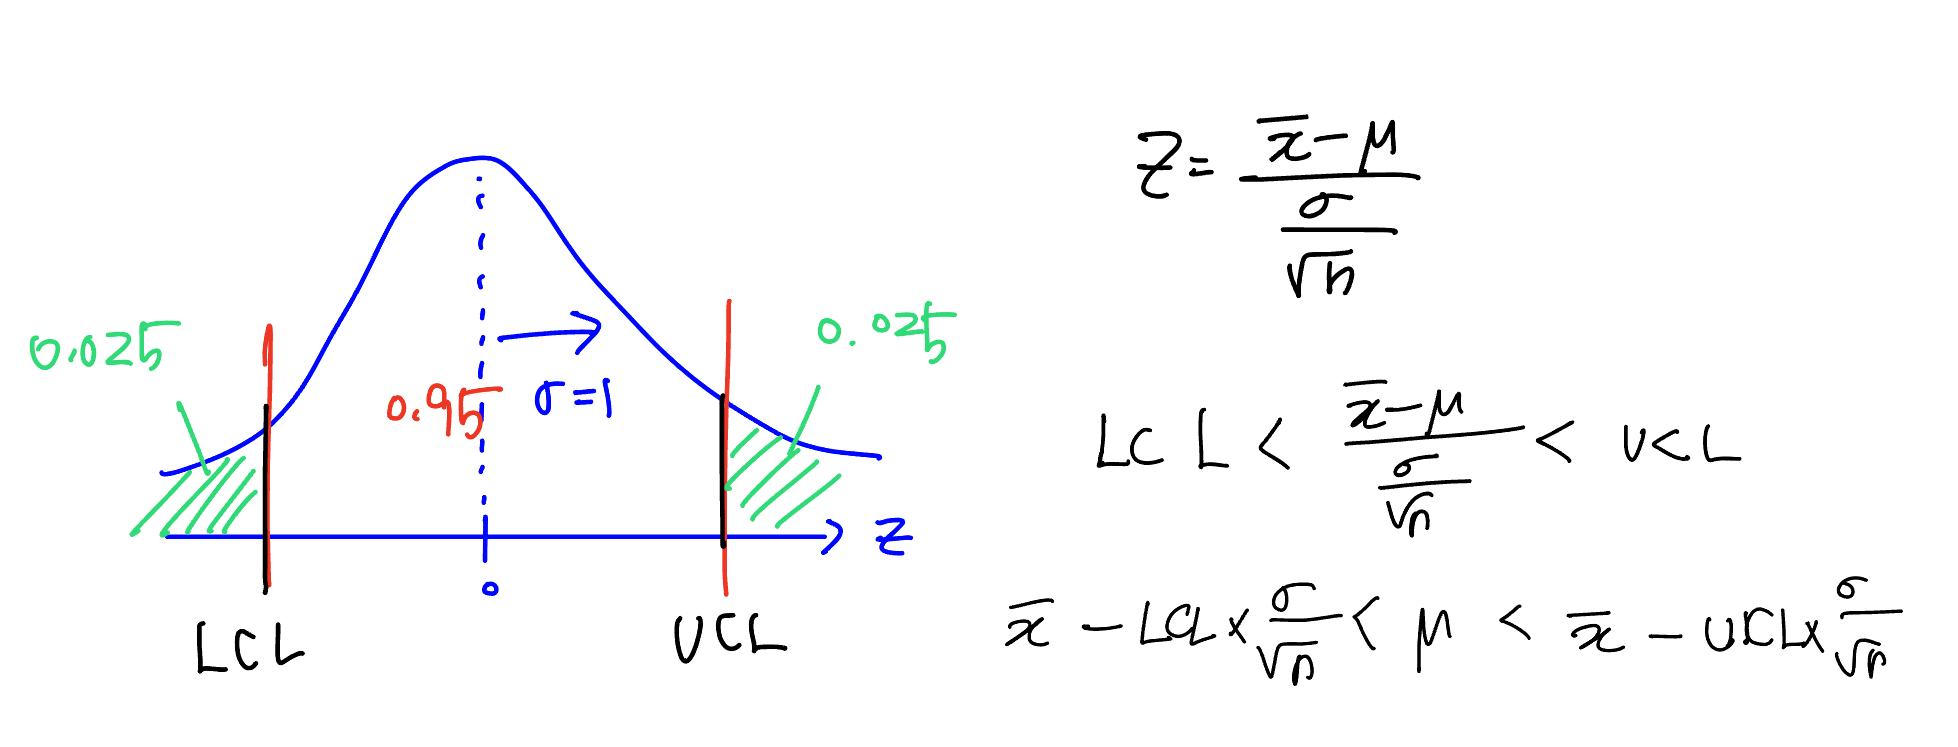

In [59]:
rv = stats.norm()   #정규분포 객체 생성

# isf : 정규분포에서 - 왼쪽 꼬리 확률(생존함수의 역함) 하한경계, 상경계


# 하한 lcl
# rv.isf(0.025) : 정규분포에서 꼬리의 2.5%에 해당하는 임계값을 계산
lcl = s_mean - rv.isf(0.025)*np.sqrt(p_var/n)

# 상한 ucl
# rv.isf(0.975) : 정규 분포에서 꼬리의 97.5%에 해당하는 임계값을 계산
ucl = s_mean - rv.isf(0.975)*np.sqrt(p_var/n)

lcl, ucl

(64.09956018535247, 76.70043981464754)

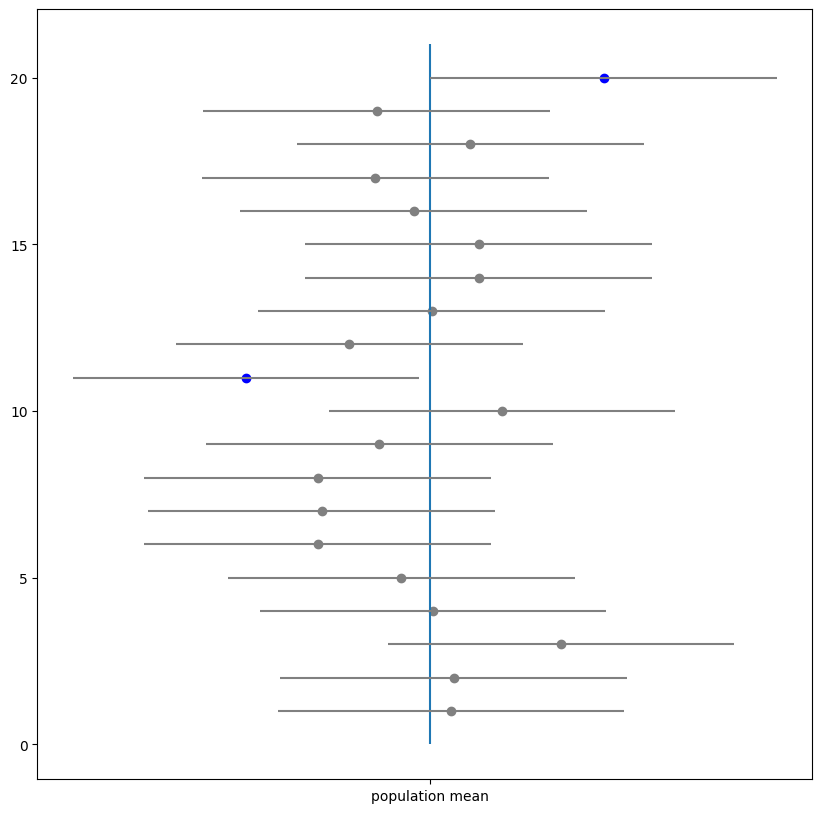

In [60]:
fig = plt.figure(figsize=[10,10])  # 그림의 크기 지정 - 가로 10인치, 세로 10인치
ax = fig.add_subplot(111)  # subplot 생성

rv = stats.norm()  # 정규분포 객체 생성
n_samples = 20  # 샘플의 개수 : 20개

# 전체 모집단 평균 : p_mean
# 전체 모집단 분산 : p_var
# 전체 모집단에서 추출한 샘플들 : samples

ax.vlines(p_mean, 0, 21)  #ax.vlines() : 전체 모집단의 평균에 0~20까지의 세로선 표시

# 각 샘플들에 대해 작업
for i in range(n_samples):
  sample_ = samples[i]   # sample_ : 한 줄 20개 랜덤으로 뽑은 scores
  s_mean_ = np.mean(sample_)  # s_mean_ : 20개 한 줄의 평균

  lcl = s_mean_ - rv.isf(0.025)*np.sqrt(p_var/n)  # 20개 한 줄에서의 하한경계
  ucl = s_mean_ - rv.isf(0.975)*np.sqrt(p_var/n)  # 20개 한 줄에서의 상한경계

  # 모평균이 신뢰구간(95%) 안에 있다면 회색으로 표시
  if lcl <= p_mean <=ucl:
    ax.scatter(s_mean_, n_samples - i, color ='gray')
    ax.hlines(n_samples-i, lcl, ucl, color='gray')

  # 모평균이 신뢰구간(95%) 안에 없다면 파란색으로 표시
  else:
    ax.scatter(s_mean_, n_samples - i, color = 'b')
    ax.hlines(n_samples-i, lcl, ucl, color='gray')


# x축에 실제 모집단의 평균을 표시
ax.set_xticks([p_mean])
ax.set_xticklabels(['population mean'])


# 그래프 출력
plt.show()


In [61]:
rv = stats.norm() # 정규분포 객체 생성
cnt = 0

for sample_ in samples:
  s_mean_ = np.mean(sample_)
  lcl = s_mean_ -rv.isf(0.025) * np.sqrt(p_var/n)  #하한경계
  ucl = s_mean_ -rv.isf(0.975) * np.sqrt(p_var/n)  #상경계

  if lcl <= p_mean <= ucl:
    cnt += 1

cnt/len(samples)   # 모평균이 신뢰구간 안에 있는 샘플의 개수

0.956

**정규분포의 모분산 - 구간추정 95%의 신뢰 구간**

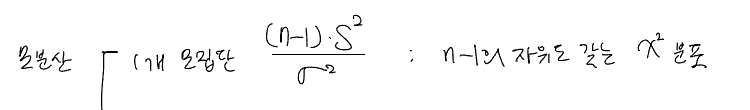

In [62]:
# sample 1000개의 각각의 분산들
sample_u_vars

array([ 41.39736842, 163.2       , 292.52631579, 271.83947368,
       182.26052632, 182.95789474, 197.37894737, 178.77894737,
       169.2       , 290.13421053, 226.45      , 102.11578947,
       313.10263158, 236.67368421, 225.62894737,  93.52631579,
       236.66052632, 219.8       , 202.77894737, 249.69473684,
       194.57631579, 209.20789474, 222.68157895, 222.41052632,
       249.94473684, 187.10263158, 229.51578947, 168.25263158,
       112.23947368, 156.83157895, 161.62894737, 248.51578947,
       153.93684211, 143.11578947, 111.77894737, 159.50263158,
       139.62894737,  99.10263158, 146.04210526, 186.11578947,
       153.60789474, 278.93684211, 239.16842105,  83.47368421,
       184.97631579, 208.66052632, 128.67368421, 118.22105263,
       211.78947368, 269.11578947, 280.02894737, 237.27368421,
       244.05      , 289.04210526, 143.77894737, 188.90526316,
       182.51315789, 265.73421053, 103.83947368, 253.85263158,
       147.04210526, 221.21052632, 193.85263158, 237.58

In [63]:
sample_y = sample_u_vars * (n-1) / p_var
sample_y

array([ 3.80584229, 15.00369431, 26.89323174, 24.99139929, 16.75601239,
       16.82012454, 18.14591538, 16.43593551, 15.55530072, 26.67331498,
       20.8185452 ,  9.38795398, 28.78490302, 21.75845349, 20.74306222,
        8.59828586, 21.75724383, 20.20718143, 18.64236115, 22.95553617,
       17.88825712, 19.23340257, 20.47209767, 20.44717861, 22.97851977,
       17.20116844, 21.10039672, 15.46820497, 10.31866883, 14.41821733,
       14.85926053, 22.84715035, 14.15209144, 13.15726444, 10.27633062,
       14.66377896, 12.8367037 ,  9.11094111, 13.42629353, 17.1104437 ,
       14.12184986, 25.64389161, 21.98780563,  7.67410319, 17.00568687,
       19.18308059, 11.82953814, 10.86858171, 19.47073849, 24.74099902,
       25.74429366, 21.81361413, 22.43659067, 26.57291293, 13.21823146,
       17.36689229, 16.77923792, 24.43011558,  9.54641986, 23.33778973,
       13.51822793, 20.33685732, 17.82172565, 21.84264605, 21.85014596,
       30.5357695 , 14.7411974 , 13.12629706, 13.50564743, 24.04

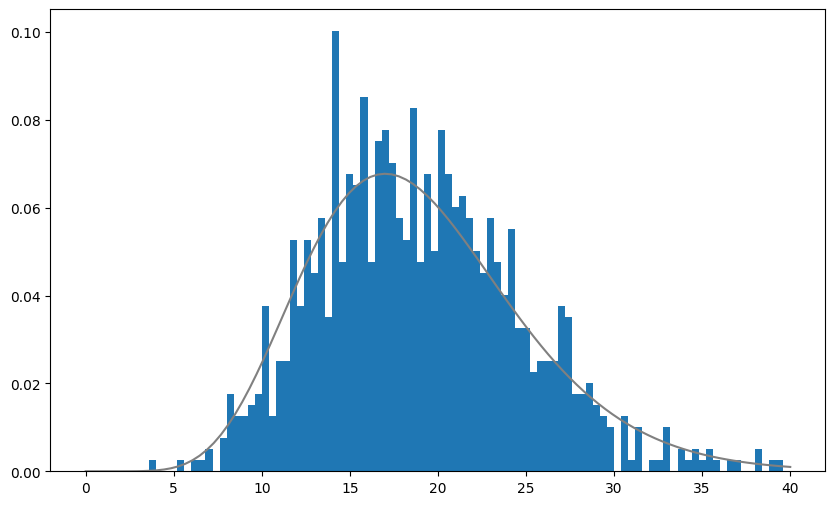

In [64]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)


xs = np.linspace(0, 40, 100)  # 0부터 40까지의 값을 갖는 배열 생성

# # 자유도가 n-1인 카이 제곱 분포 객체 생성
rv = stats.chi2(df=n-1)   # stats.chi2(df = 자유도) : 카이제곱 분포 객체 생성

 # 카이 제곱 분포의 확률 밀도 함수(PDF)를 그려서 회색 선으로 표시
ax.plot(xs, rv.pdf(xs), color='gray')

# 주어진 샘플 데이터에 대한 히스토그램을 그려서 밀도로 정규화
hist, _, _ = ax.hist(sample_y, bins=100, range=(0,40), density=True)

plt.show()

In [65]:
# 카이제곱분포
rv = stats.chi2(df=n-1)

# 카이제곱분포에서 하한경계, 상한경계
lcl = (n-1) * u_var /rv.isf(0.025)
hcl = (n-1) * u_var /rv.isf(0.975)

lcl, hcl

(91.52471947132238, 337.5955129124592)

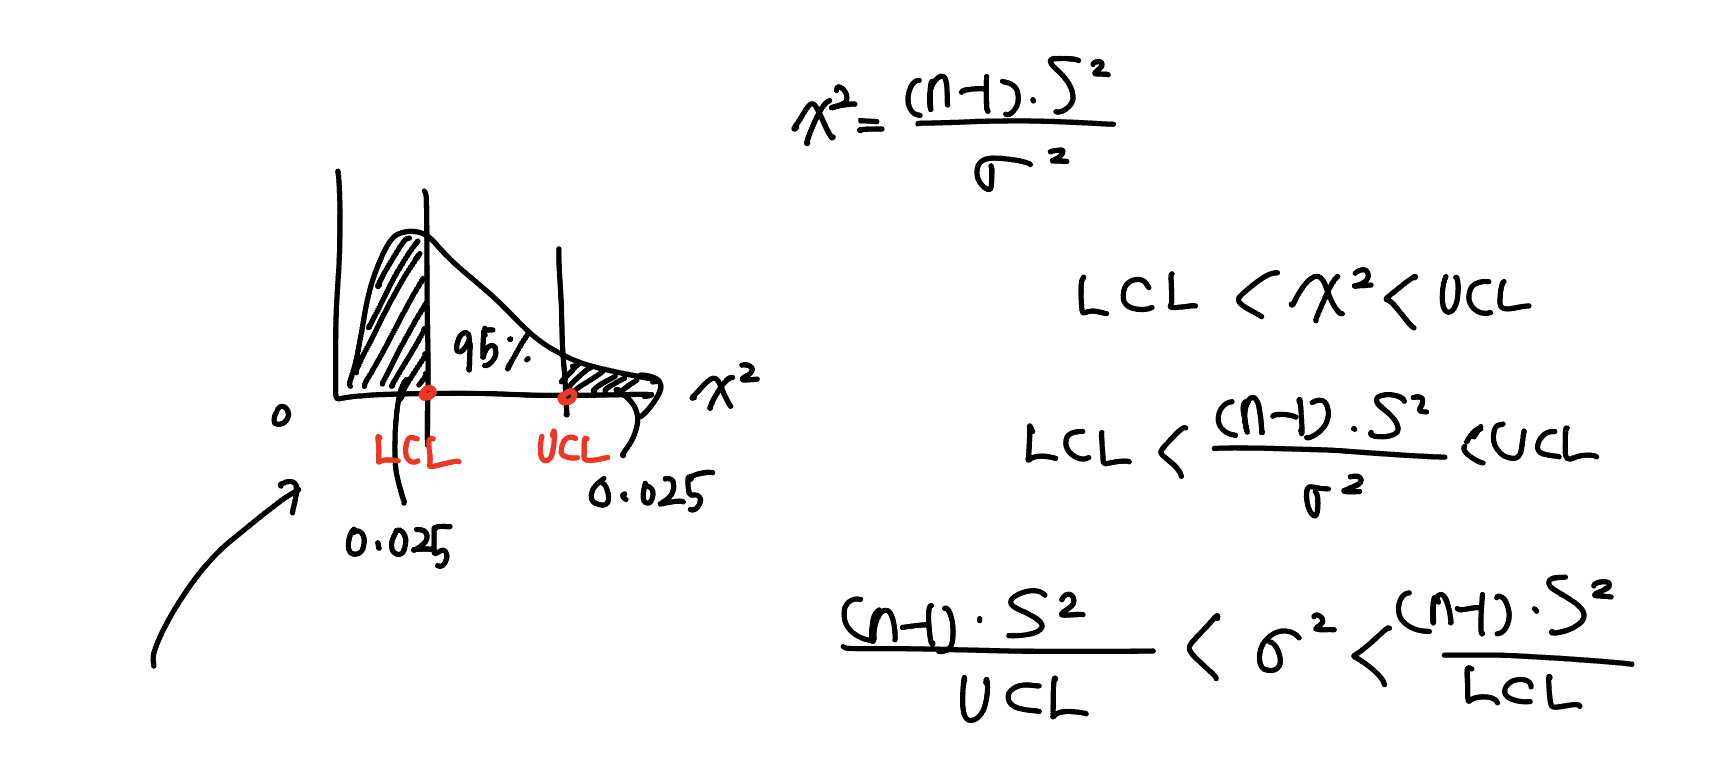

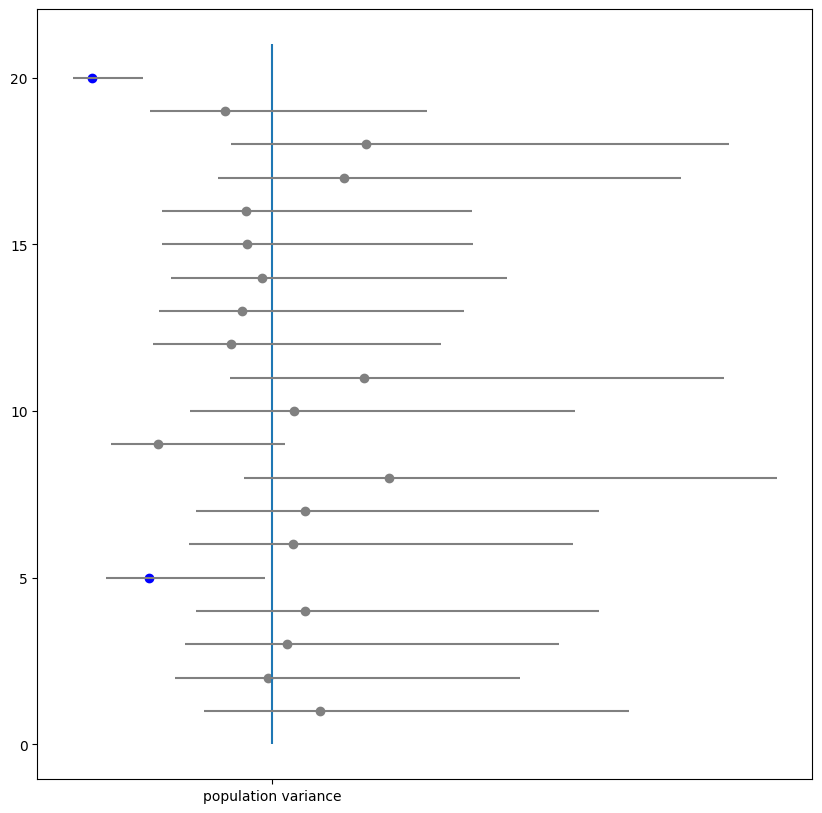

In [66]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

rv = stats.chi2(df=n-1)
n_samples = 20
ax.vlines(p_var, 0, 21)

for i in range(n_samples):
  sample_ = samples[i]
  u_var_ = np.var(sample_, ddof=1)

  lcl = (n-1) * u_var_ /rv.isf(0.025)
  ucl = (n-1) * u_var_ /rv.isf(0.975)

  if lcl <= p_var <=ucl:
    ax.scatter(u_var_, n_samples - i, color ='gray')
    ax.hlines(n_samples-i, lcl, ucl, color='gray')
  else:
    ax.scatter(u_var_, n_samples - i, color = 'b')
    ax.hlines(n_samples-i, lcl, ucl, color='gray')

ax.set_xticks([p_var])
ax.set_xticklabels(['population variance'])

plt.show()


# **정규분포의 모평균(-모분산을 알지 못하는) 구간추정 -> t 분포표 이용**

In [67]:
# (n - 1)의 자유도를 가지는 t분포를 가
rv = stats.t(df=n-1)
lcl = s_mean -rv.isf(0.025) * np.sqrt(u_var/n)
ucl = s_mean -rv.isf(0.975) * np.sqrt(u_var/n)

lcl, ucl

(64.51244886603887, 76.28755113396114)